        Data Science: A Programming Approach
        Mahyar S Vaghefi
        University of Texas Arlington

<h1 align='center' style="color: blue;">Assignment #3</h1>

<p><b>Question #1</b>
    <ol>
        <li>Download the diabetes.csv dataset from the Canvas and use <b>read_csv( )</b> to read it.</li>
        <li>Use <u>Decision Tree</u> to create a prediction model:</li>
        <ul>
            <li>Use grid search to find the depth of tree (try values between 2-8)</li>
            <li>Use 5-fold stratified cross validation in your work.</li> 
            <li><b>Outcome</b> is your dependent variable</li>
            <li>Use all other features as independent variables</li>
        </ul>
        <li>Perform Additional Data Aanalysis:</li>
        <ul>
            <li>Use full dataset to create another predictive model using Decision Tree (use the best depth that you found in last step)</li>
            <li>What is the in-sample prediction accuracy?</li>
            <li>Find the feature importance.(How you can interpret it)</li>
        </ul>
        <li>Create three predction models using Logistic Regression, SVM, and Random Forest:</li>
        <ul>
            <li>Use 70% of data for tarining and consider 30% of data for testing. (Use <b style="color:red">random_state=0</b>)</li>
            <li> Report the out-sample accuracy for all models</li>
        </ul>
        <li>Compute Precision, Recall, F1 and AUC values for the prediction models in the last step. Which one has the best performance. (Write your logit for selection of the best model)</li>
        <li>Draw ROC Curve for Logistic Regression model</li>
    </ol>
            

In [1]:
# Write your answer here (part1)
import pandas as pd
diabetes = pd.read_csv("diabetes.csv")
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
# Write your answer here (part2)
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split

y = diabetes['Outcome']
X = diabetes.drop('Outcome', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

y_train_hat  = model.predict(X_train)
y_test_hat  = model.predict(X_test)
in_sample_acc = accuracy_score(y_train,y_train_hat, normalize = True) * 100
out_of_sample_acc = accuracy_score(y_test,y_test_hat, normalize = True) * 100
print("In-sample Accuracy: ", in_sample_acc)
print("Out-of-sample Accuracy: ", out_of_sample_acc)

model = DecisionTreeClassifier()
param_grid = {'max_depth': [3,4,5,6,7]}
cv = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
grid = GridSearchCV(model, param_grid, cv = cv, 
                    return_train_score=True, scoring='accuracy')
grid.fit(X_train, y_train)

print("Best Parameter: {}".format(grid.best_params_))
print("Best Cross Validation Score: {}".format(grid.best_score_))

In-sample Accuracy:  100.0
Out-of-sample Accuracy:  71.875
Best Parameter: {'max_depth': 3}
Best Cross Validation Score: 0.7152777777777778


In [3]:
# Write your answer here (part3)
bestModel = grid.best_estimator_
y_train_hat  = bestModel.predict(X_train)
y_test_hat  = bestModel.predict(X_test)
in_sample_acc = accuracy_score(y_train,y_train_hat, normalize = True) * 100
out_of_sample_acc = accuracy_score(y_test,y_test_hat, normalize = True) * 100
print("In-sample Accuracy: ", in_sample_acc)
print("Feature Importances : {}".format(bestModel.feature_importances_))

In-sample Accuracy:  76.21527777777779
Feature Importances : [0.         0.58371905 0.         0.         0.         0.1612313
 0.05737005 0.1976796 ]


# How can we interpret the feature importances
From the above implementation, we can see that the best model chosen here has a max depth of 3 and the most important feature is the Glucose feature which has the importance value of approximately 0.584

In [4]:
# Write your answer here (part4)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVC

y = diabetes['Outcome']
X = diabetes.drop('Outcome', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

logRegModel = LogisticRegression()
svmModel = SVC(kernel='linear', probability=True)
randForestModel = RandomForestClassifier()

#performing logistic regression
logRegModel.fit(X_train, y_train)
LR_test_hat = logRegModel.predict(X_test)
LR_outSampleAccuracy = accuracy_score(y_test, LR_test_hat, normalize = True) * 100
print("Out sample accuracy for Logistic Regression : {}".format(LR_outSampleAccuracy))

#performing SVM
svmModel.fit(X_train, y_train)
SVM_test_hat = svmModel.predict(X_test)
SVM_outSampleAccuracy = accuracy_score(y_test, SVM_test_hat, normalize = True) * 100
print("Out sample accuracy for SVM Classifier : {}".format(SVM_outSampleAccuracy))

#performing Random forest regression
randForestModel.fit(X_train, y_train)
RF_test_hat = randForestModel.predict(X_test)
RF_outSampleAccuracy = accuracy_score(y_test, RF_test_hat, normalize = True) * 100
print("Out sample accuracy for Random Forest Regressor : {}".format(RF_outSampleAccuracy))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Out sample accuracy for Logistic Regression : 78.35497835497836
Out sample accuracy for SVM Classifier : 78.35497835497836
Out sample accuracy for Random Forest Regressor : 77.05627705627705


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [5]:
# Write your answer here (part5)
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

#precision, recall, f1 and AUC for Logistic regression
print("Logistic Regression")
print('Precision : {}'.format(precision_score(y_test, LR_test_hat)))
print('Recall : {}'.format(recall_score(y_test, LR_test_hat)))
print('F1 score : {}'.format(f1_score(y_test, LR_test_hat)))
print('AUC score : {}'.format(roc_auc_score(y_test, logRegModel.predict_proba(X_test)[:,1])))
print()

#precision, recall, f1 and AUC for SVM classifier
print("SVM")
print('Precision : {}'.format(precision_score(y_test, SVM_test_hat)))
print('Recall : {}'.format(recall_score(y_test, SVM_test_hat)))
print('F1 score : {}'.format(f1_score(y_test, SVM_test_hat)))
print('AUC score : {}'.format(roc_auc_score(y_test, svmModel.predict_proba(X_test)[:,1])))
print()

#precision, recall, f1 and AUC for Random forest classifier
print("Random Forest Classifier")
print('Precision : {}'.format(precision_score(y_test, RF_test_hat)))
print('Recall : {}'.format(recall_score(y_test, RF_test_hat)))
print('F1 score : {}'.format(f1_score(y_test, RF_test_hat)))
print('AUC score : {}'.format(roc_auc_score(y_test, randForestModel.predict_proba(X_test)[:,1])))

Logistic Regression
Precision : 0.7222222222222222
Recall : 0.527027027027027
F1 score : 0.609375
AUC score : 0.8388707178516095

SVM
Precision : 0.7142857142857143
Recall : 0.5405405405405406
F1 score : 0.6153846153846154
AUC score : 0.8329316577724221

Random Forest Classifier
Precision : 0.6721311475409836
Recall : 0.5540540540540541
F1 score : 0.6074074074074074
AUC score : 0.8159752108796695


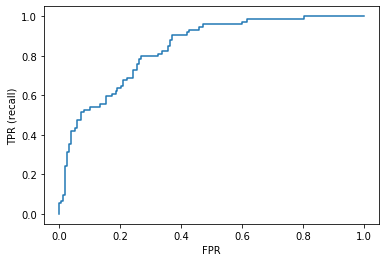

In [7]:
# Write your answer here (part6)
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
fpr, tpr, thresholds = roc_curve(y_test, logRegModel.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)");
plt.show()

<p><b>Question #2</b>: Consider the following dataset 

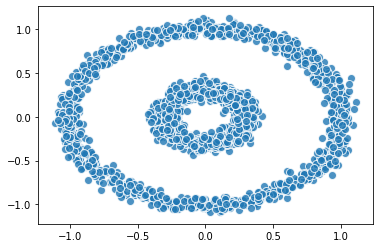

In [8]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
N_samples = 2000
X = np.array(datasets.make_circles(n_samples=N_samples,
                                   noise=0.05, factor=0.3)[0])    
plt.scatter(X[:,0], X[:,1], alpha=0.8, s=64, edgecolors='white');

<ol>
    <li>Use K-Means to cluster the points and visualize your result</li>
    <li>Use Spectral Clustering to cluster the points and visualize your result</li>
    <li>Use Agglomerative Clustering to cluster the points and visualize your result</li>
    <li>Use DBSCAN to cluster the points and visualize your result</li>
    <li>(optional) Use HDBSCAN to cluster the points and visualize your result</li>
</ol>

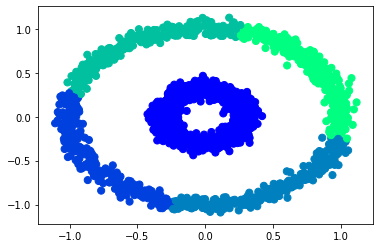

In [9]:
# Write your answer here (part1)
from sklearn.cluster import KMeans 

kmeans_model = KMeans(n_clusters=5, random_state=0) 
kmeans_model.fit(X)
y_kmeans = kmeans_model.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='winter');

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\spectral_embedding_.py:235: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


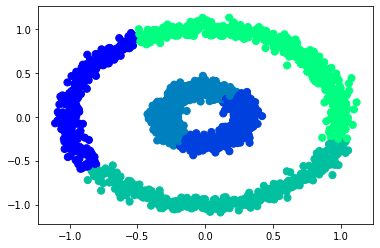

In [10]:
# Write your answer here (part2)
from sklearn.cluster import SpectralClustering 
model = SpectralClustering(n_clusters=5,
                           affinity='nearest_neighbors',
                           assign_labels='kmeans',
                           n_neighbors = 8)
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='winter');

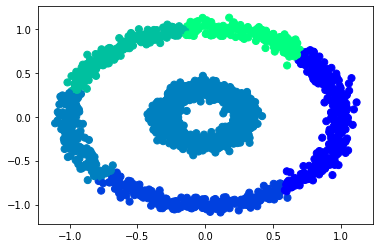

In [11]:
# Write your answer here (part3)
from sklearn.cluster import AgglomerativeClustering
agg_model = AgglomerativeClustering(n_clusters=5,linkage='complete')
y_agg = agg_model.fit_predict(X)                
plt.scatter(X[:, 0], X[:, 1], c=y_agg, s=50, cmap='winter');

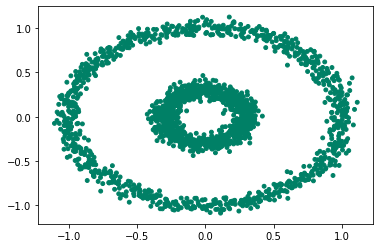

In [12]:
# Write your answer here (part4)
from sklearn.cluster import DBSCAN
dbScan = DBSCAN(min_samples=3, eps=1.5)
y_dbScan = dbScan.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_dbScan, s=15, cmap='summer');

In [13]:
# Write your answer here (part5)
#hdbscan not available for import

<p><b>Question #3</b>: Consider the following image (<u>Download the France.jpg file from Canvas</u>)

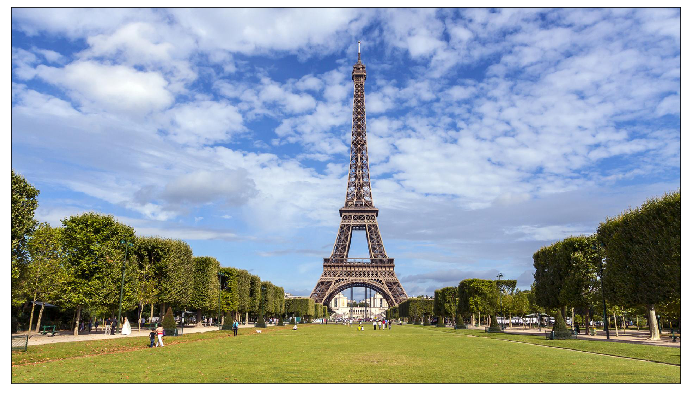

In [14]:
import matplotlib.image as mpimg
fig, ax = plt.subplots(figsize=(12, 18))
France = np.array(mpimg.imread('France.jpg'))
ax.imshow(France)
ax.set(xticks=[], yticks=[]);

<ol>
    <li>Reduce the number of colors to 64 and visualize the image (use K-Means)</li>
    <li>Reduce the number of colors to 16 and visualize the image (use K-Means)</li>
    <li>Reduce the number of colors to 8 and visualize the image (use K-Means)</li>
</ol>

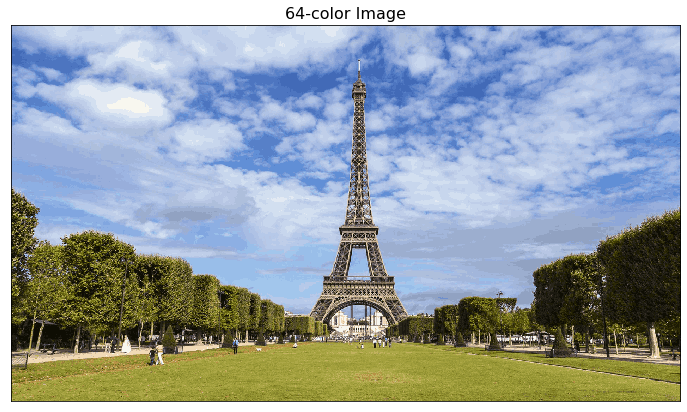

In [15]:
# Write your answer here (part1)
import numpy as np
from sklearn.cluster import MiniBatchKMeans

n_colors_64 = 64
width,height,_ = France.shape
tmpImage64 = France.reshape(width*height,3)

kMeans64 = MiniBatchKMeans(n_clusters=n_colors_64, random_state=0).fit(tmpImage64)

labels_64 = kMeans64.predict(tmpImage64)

newColors64 = np.array(kMeans64.cluster_centers_).astype(int)

#recolouring the image
recoloured64_Image = np.copy(tmpImage64)
for i in range(len(recoloured64_Image)):
    recoloured64_Image[i] = newColors64[labels_64[i]]

recoloured64_Image = recoloured64_Image.reshape(width,height,3)

fig, ax = plt.subplots(figsize=(12, 18))
ax.imshow(recoloured64_Image)
ax.set_title('64-color Image', size=16);
ax.set(xticks=[], yticks=[]);

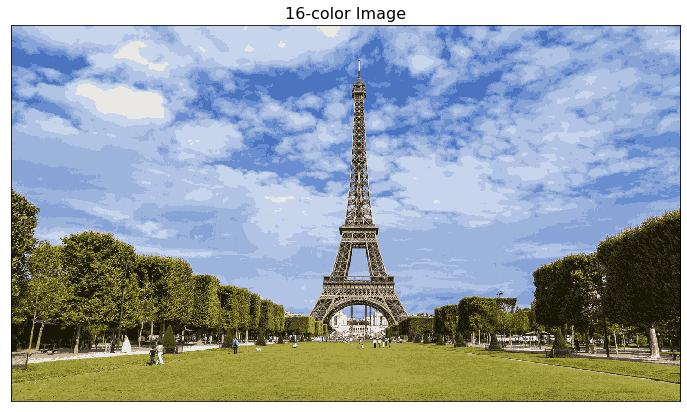

In [16]:
# Write your answer here (part2)
n_colors_16 = 16
width,height,_ = France.shape
tmpImage16 = France.reshape(width*height,3)

kMeans16 = MiniBatchKMeans(n_clusters=n_colors_16, random_state=0).fit(tmpImage16)

labels_16 = kMeans16.predict(tmpImage16)

newColors16 = np.array(kMeans16.cluster_centers_).astype(int)

#recolouring the image
recoloured16_Image = np.copy(tmpImage16)
for i in range(len(recoloured16_Image)):
    recoloured16_Image[i] = newColors16[labels_16[i]]

recoloured16_Image = recoloured16_Image.reshape(width,height,3)

fig, ax = plt.subplots(figsize=(12, 18))
ax.imshow(recoloured16_Image)
ax.set_title('16-color Image', size=16);
ax.set(xticks=[], yticks=[]);

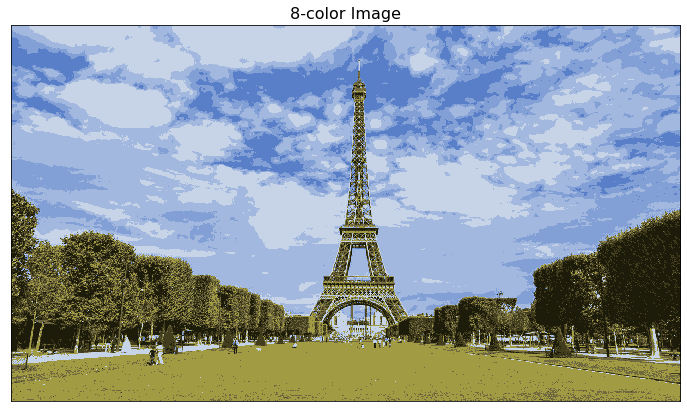

In [17]:
# Write your answer here (part3)
n_colors_8 = 8
width,height,_ = France.shape
tmpImage8 = France.reshape(width*height,3)

kMeans8 = MiniBatchKMeans(n_clusters=n_colors_8, random_state=0).fit(tmpImage8)

labels_8 = kMeans8.predict(tmpImage8)

newColors8 = np.array(kMeans8.cluster_centers_).astype(int)

#recolouring the image
recoloured8_Image = np.copy(tmpImage8)
for i in range(len(recoloured8_Image)):
    recoloured8_Image[i] = newColors8[labels_8[i]]

recoloured8_Image = recoloured8_Image.reshape(width,height,3)

fig, ax = plt.subplots(figsize=(12, 18))
ax.imshow(recoloured8_Image)
ax.set_title('8-color Image', size=16);
ax.set(xticks=[], yticks=[]);

<p><b>Question #4</b>: The following code download images of top 200 players (<u>Download Fifa Data from Blackboard</u>)

In [18]:
from PIL import Image
import requests
from io import BytesIO
import pandas as pd

def read_image(url):
    response = requests.get(url)
    img = np.array(Image.open(BytesIO(response.content)).convert('RGBA'))
    return img

FIFA20 = pd.read_csv("Fifa20/data.csv")
TOP_200_Players = FIFA20.sort_values(by = ['Overall'], ascending=False)[:200]
images =np.array([read_image(url) for url in TOP_200_Players.Photo])
player_names = np.array([Name for Name in TOP_200_Players.Name])
data = np.array([image.reshape(240*240*4) for image in images])

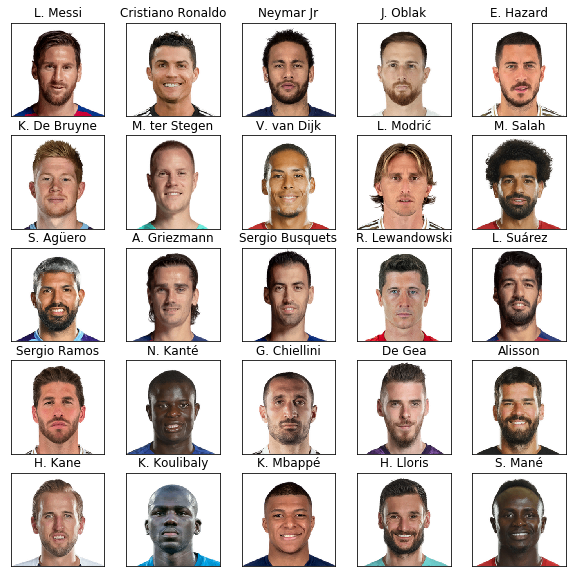

In [19]:
fig, ax = plt.subplots(5, 5, figsize=(10, 10)) 
for i, axi in enumerate(ax.flat):
    axi.imshow(images[i]) 
    axi.set_title(player_names[i]) 
    axi.set(xticks=[], yticks=[])

Here is some description about data
<ul>
    <li>images: contains 200 images of players. images.shape = (200, 240, 240, 4)</li> 
    <li>player_names: contains 200 names of players. player_names.shape = (200,)</li>
    <li>data: contains flatten version of images. data.shape = (200, 230400)</li>
</ul>

You need to cluster the images using K-Means algorithm
<ol>
    <li>Use PCA method to reduce the number of dimensions to 200.</li>
    <li>Find the best number of clusters using elbow method.</li>
    <li>Find the best number of clusters using silhouette method.</li>
    <li>Cluster images using an optimal number of clusters</li>
    <li>Visualize the center of clusters (<b>Tip</b>: to perform this part you have two options: (1) use inverse_transform() function in pca and change back the number of dimensions in cluster centers to 230400 - read more <a href='https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html'>here</a> ,(2) for each cluster, find the average of all the pixels of the images in the cluster.)</li>
    <li>Show sample of images in each cluster</li>
    <li>How can you interpret the result of clustering</li>
</ol>

In [20]:
# Write your answer here (part1)
from sklearn.decomposition import PCA

dataPCA = PCA(n_components=200)
newData = dataPCA.fit_transform(data)

print("Reduced data shape : {}".format(newData.shape))

Reduced data shape : (200, 200)


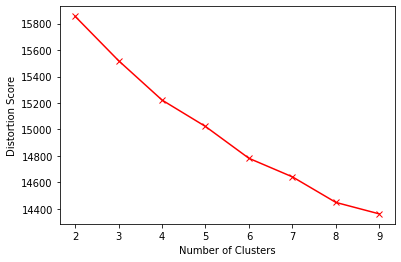

In [21]:
# Write your answer here (part2)
from scipy.spatial.distance import cdist

distortions = []
n_clusters = range(2,10)
for k in n_clusters:
    kmeans_model = KMeans(n_clusters=k, random_state=0).fit(newData)
    kmeans_model.fit(newData)
    distortions.append(sum(np.min(cdist(newData, kmeans_model.cluster_centers_, 'euclidean'), axis=1)) / newData.shape[0])

# Plot the elbow
plt.plot(n_clusters, distortions, 'rx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion Score');

In [22]:
# Write your answer here (part3)
from sklearn.metrics import silhouette_samples, silhouette_score

n_clusters = range(2,20)
for k in n_clusters:
    kmeans_model = KMeans(n_clusters=k, random_state=0).fit(newData)
    y_kmeans = kmeans_model.predict(newData)
    
    silhouette_avg = silhouette_score(newData, y_kmeans)
    print("For {} clusters the average silhouette score is {}".format(k,silhouette_avg))

For 2 clusters the average silhouette score is 0.08395873051723533
For 3 clusters the average silhouette score is 0.08246218456151524
For 4 clusters the average silhouette score is 0.04467815346209564
For 5 clusters the average silhouette score is 0.05516643952580061
For 6 clusters the average silhouette score is 0.0401502175731331
For 7 clusters the average silhouette score is 0.04511291712587772
For 8 clusters the average silhouette score is 0.040468290214156294
For 9 clusters the average silhouette score is 0.04566615580322482
For 10 clusters the average silhouette score is 0.03674654384583888
For 11 clusters the average silhouette score is 0.038834058072666384
For 12 clusters the average silhouette score is 0.04003878357698014
For 13 clusters the average silhouette score is 0.03840299737717603
For 14 clusters the average silhouette score is 0.04109379837024413
For 15 clusters the average silhouette score is 0.047549930643578285
For 16 clusters the average silhouette score is 0.0461

In [23]:
# Write your answer here (part4)

kPCA = PCA(n_components=200, whiten=True, random_state=0)
kNewData = kPCA.fit_transform(data)

kmeans_model = KMeans(n_clusters=4, random_state=0)
labels = kmeans_model.fit_predict(kNewData)
print("Cluster sizes k-means: {}".format(np.bincount(labels)))

Cluster sizes k-means: [92 36 38 34]


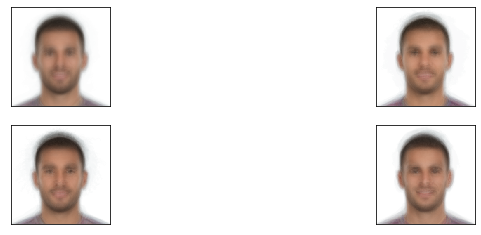

In [24]:
# Write your answer here (part5)
fig, axes = plt.subplots(2, 2, subplot_kw={'xticks': (), 'yticks': ()}, figsize=(12, 4))
for center, ax in zip(kmeans_model.cluster_centers_, axes.ravel()):
    ax.imshow(kPCA.inverse_transform(center).reshape(images[0].shape).astype(np.uint8))

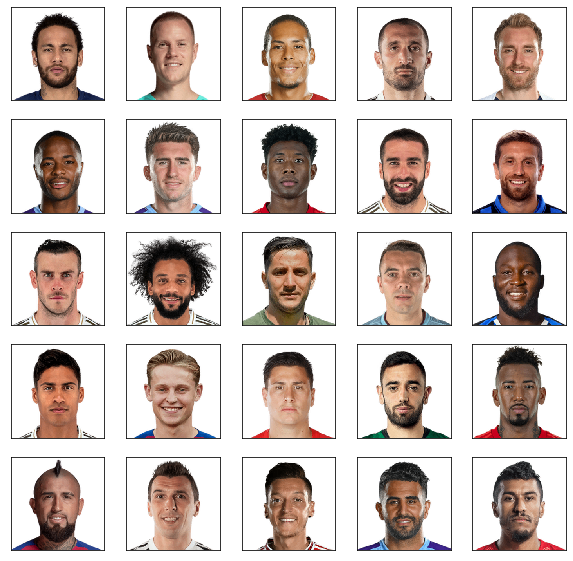

In [25]:
# Write your answer here (part6)

mask = (labels == 2) # sample images in cluster 2
cluster_images = images[mask]
cluster_target = player_names[mask]
fig, ax = plt.subplots(5, 5, figsize=(10, 10)) 
for i, axi in enumerate(ax.flat):
    axi.imshow(cluster_images[i].astype(np.uint8)) 
    axi.set(xticks=[], yticks=[])

# Write your answer here (part7)

Cluster Interpretation:
From the elbow curve plotted earlier we can see that as the number of cluster increase we can see a decrease in the distortions occuring.

<p><b>Output</b>: 
    <ul>
        <li>You need to provide answers in the designated cell for each question (don't delete the existing comments in the cells).</li>
        <li>You need to make sure that your final file contains both codes and results (don't clear the outputs).</li>
        <li>Save your file in the .ipynb format (as it is right now).</li>
        <li>Create a zip-folder and put your file in it.</li>
        <li>Upload the zip-folder into Canvas (Assignment #3)</li>
        <li>All the assignments should be submitted by <b>Mon Apr 20 at 7:00 PM</b>. No late submission will be accepted</li>
        <li>I will not accept any submission by email or any other method, so make sure that you submit the file in a right place at the right time.</li>
        </ul>
</p> 